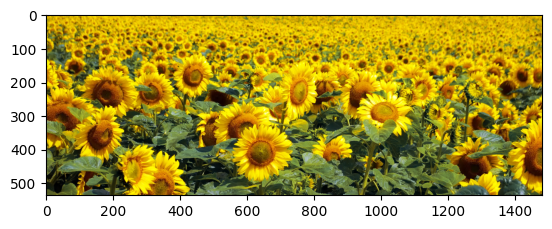

In [56]:
#Import Libraries
import cv2
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt


#Import the image and convert to rgb
img = cv2.imread('Graphics/Input.png', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(img)

#Create a mask of the lower portion of the image
img_masked = img[550:1087, 0:1480]
plt.imshow(img_masked)

In [57]:
img_masked_hsv = cv2.cvtColor(img_masked, cv2.COLOR_RGB2HSV)
#plt.imshow(img_masked_hsv)

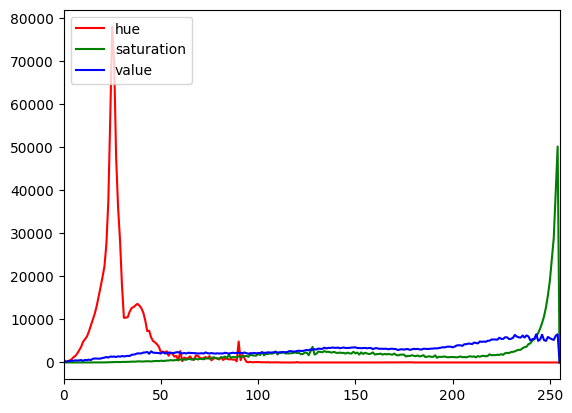

In [58]:

# Hue
hist = cv2.calcHist([img_masked_hsv],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img_masked_hsv],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img_masked_hsv],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()

In [59]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

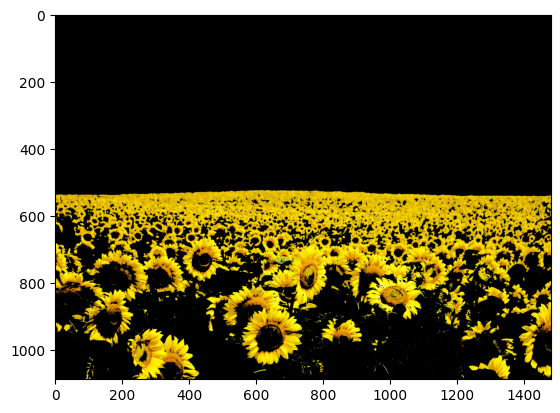

In [89]:
#Create a mask based on values from histogram
#define lower and upper bounds based on histogram
lower_bound = np.array([0, 100, 190], np.uint8)
upper_bound = np.array([90,255, 255], np.uint8)
#masking the image using inRange() function
mask = cv2.inRange(img_hsv, lower_bound, upper_bound)
#Uncomment to show mask  
#plt.imshow(mask, cmap="gray")

#Apply the mask by comparing pixels from mask to image
output = cv2.bitwise_and(img, img, mask=mask)

# Plot the masked image.
plt.imshow(output)